In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#import data
df = pd.read_csv('dfFeatureEngineering.csv',index_col =0)

In [3]:
#list of questions and ideas

#does training the data on the log of sales price make a difference for KNN?

In [20]:
#filters for looking at data

objectFilter = ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'DataType',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType']

intFilter = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']

OrgFeatures = [objectFilter + intFilter]

FeatEnginer = list(df.columns[-9:])

intFilterAll = intFilter + FeatEnginer

In [21]:
type(intFilter)
print(intFilter)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [22]:
type(intFilterAll)

list

In [24]:
print(intFilterAll)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotFullBath', 'TotHalfBath', 'HouseAge', 'YrSinceRemod', 'TotSF', 'HasBasement', 'Has2Floor', 'HasGarage', 'HasPool']


In [25]:
dfTrain = df[df['DataType']== 1].copy() #.copy makes it explict that we want a copy, not a view of the orignal frame
dfTest = df[df['DataType']== 0].copy()

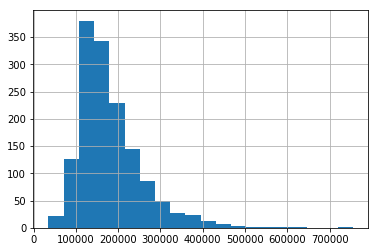

In [26]:
dfTrain.SalePrice.hist(bins = 20)

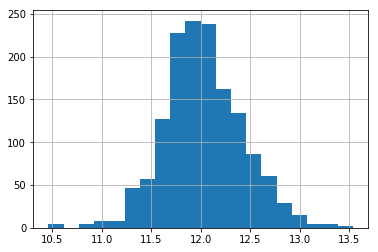

In [27]:
#Makes the price more uniform, but is that something we actually want?  
SalePriceLog = np.log(dfTrain.SalePrice)
SalePriceLog.hist(bins = 20)

In [28]:
print(dfTrain.shape)
print(dfTest.shape)

(1460, 78)
(1459, 78)


In [29]:
dfTrain['SalePriceLog'] = np.log(dfTrain.SalePrice)

In [30]:
dfTrain[['SalePrice','SalePriceLog']].head()

,SalePrice,SalePriceLog
0,208500.0,12.247694
1,181500.0,12.109011
2,223500.0,12.317167
3,140000.0,11.849398
4,250000.0,12.429216


In [47]:
#creates a data frame filled with correlations
corr = dfTrain[intFilterAll + ['SalePriceLog']].corr().copy()

In [48]:
#says what everthing is correlated with Sale Price

#but can do better by sorting values

corr[['SalePrice','SalePriceLog']].sort_values(by = 'SalePrice',ascending = False)
#going to creat a new column of this.  Idea that farther away from zero, the better

,SalePrice,SalePriceLog
SalePrice,1.000000,0.948374
SalePriceLog,0.948374,1.000000
OverallQual,0.790982,0.817184
TotSF,0.716883,0.710274
GrLivArea,0.708624,0.700927
GarageCars,0.640409,0.680625
GarageArea,0.623431,0.650888
TotalBsmtSF,0.613581,0.612134
1stFlrSF,0.605852,0.596981
TotFullBath,0.582934,0.615054


In [55]:
corr['SalesDiff'] = (corr['SalePriceLog'] - corr['SalePrice'])

In [56]:
corr['SalesDiff'].sort_values(ascending = False)
#Think this shows me that SalePrice Log is the better thing to try and aim for.  Would need to talk through the math with someone

HasGarage        0.086167
YearBuilt        0.063673
YearRemodAdd     0.058507
SalePriceLog     0.051626
OverallCond      0.040988
BedroomAbvGr     0.040831
GarageCars       0.040216
FullBath         0.034107
TotHalfBath      0.032157
TotFullBath      0.032120
HalfBath         0.029875
HasBasement      0.029230
GarageArea       0.027456
OverallQual      0.026203
Fireplaces       0.022521
BsmtFinSF2       0.016211
Has2Floor        0.012894
BsmtHalfBath     0.011695
MoSold           0.010897
MSSubClass       0.010325
3SsnPorch        0.010317
ScreenPorch      0.009761
WoodDeckSF       0.009722
BsmtFullBath     0.009102
BsmtUnfSF        0.007506
OpenPorchSF      0.005197
Id               0.003974
MiscVal          0.001169
TotRmsAbvGrd     0.000699
2ndFlrSF        -0.000034
TotalBsmtSF     -0.001447
LotArea         -0.006523
TotSF           -0.006609
GrLivArea       -0.007698
YrSold          -0.008340
1stFlrSF        -0.008871
KitchenAbvGr    -0.011641
LowQualFinSF    -0.012357
BsmtFinSF1  

In [57]:
topBot5 = ['OverallQua','TotSF','GrLivArea','GarageCars','GarageArea',
           'MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge']

topBot10 = ['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold',
            'OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge',
'OverallQual','TotSF','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','TotFullBath','FullBath','TotRmsAbvGrd']

In [62]:
#not sure this really did anything
corr2 = dfTrain[objectFilter + ['SalePrice','SalePriceLog']]

In [85]:
#dfTrain[SalePriceLog].group_by(df['Neighborhood']).mean()
NeighborhoodMean = dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).mean()
#dfTrain['SalePriceLog'].groupby(dfTrain['Neighborhood']).median()).sort_values(ascending = True)

#print(dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).mean())
#print(dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).median())

In [96]:
NeighboorhoodMapping = NeighborhoodMean.sort_values(ascending = True)

In [100]:
NeighboorhoodMapping

Neighborhood
10     98576.470588
9     100123.783784
2     104493.750000
3     124834.051724
7     128219.700000
17    128225.300885
19    136793.135135
1     137500.000000
18    142591.360000
13    142694.444444
12    145847.080000
11    156270.122449
20    186555.796610
14    189050.068493
8     192854.506329
0     194870.882353
5     197965.773333
6     210624.725490
4     212565.428571
21    225379.837209
24    238772.727273
23    242247.447368
22    310499.000000
16    316270.623377
15    335295.317073
Name: SalePrice, dtype: float64

In [112]:
NeighboorhoodMapping.median()
#Index 14 is the middle one

186555.7966101695

In [128]:
index = (NeighboorhoodMapping.index.values)

In [134]:
values = (NeighboorhoodMapping.values)

In [135]:
index = list(index)
print(type(values))

<class 'numpy.ndarray'>


In [136]:
values2 = (values/186555.7966101695)*100

In [137]:
values2 = list(values2)
type(values2)

list

In [146]:
print(index)
print(values2)

[10, 9, 2, 3, 7, 17, 19, 1, 18, 13, 12, 11, 20, 14, 8, 0, 5, 6, 4, 21, 24, 23, 22, 16, 15]
[52.84020779811123, 53.669618207042014, 56.012062824481468, 66.915128874281777, 68.729946927315424, 68.732949184579752, 73.325588172947889, 73.704490827118391, 76.433626073791515, 76.488882702809519, 78.17879832743273, 83.765889502498055, 100.0, 101.33701119359657, 103.37631412874634, 104.45715753348959, 106.11612017985502, 112.9017319844108, 113.94201222040252, 120.81095377607605, 127.98998026937285, 129.85254372697185, 166.43760507148676, 169.53138370581345, 179.72924088432919]


In [147]:
index_values = zip(index,values2)

In [148]:
test_dict = dict(index_values)

In [149]:
print(test_dict)

{10: 52.84020779811123, 9: 53.669618207042014, 2: 56.012062824481468, 3: 66.915128874281777, 7: 68.729946927315424, 17: 68.732949184579752, 19: 73.325588172947889, 1: 73.704490827118391, 18: 76.433626073791515, 13: 76.488882702809519, 12: 78.17879832743273, 11: 83.765889502498055, 20: 100.0, 14: 101.33701119359657, 8: 103.37631412874634, 0: 104.45715753348959, 5: 106.11612017985502, 6: 112.9017319844108, 4: 113.94201222040252, 21: 120.81095377607605, 24: 127.98998026937285, 23: 129.85254372697185, 22: 166.43760507148676, 16: 169.53138370581345, 15: 179.72924088432919}


In [ ]:
#clean up this code!! and use it to add a new column to explore!